In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots

import seaborn as sns
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors 

In [58]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [60]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

# Data Visualiztion


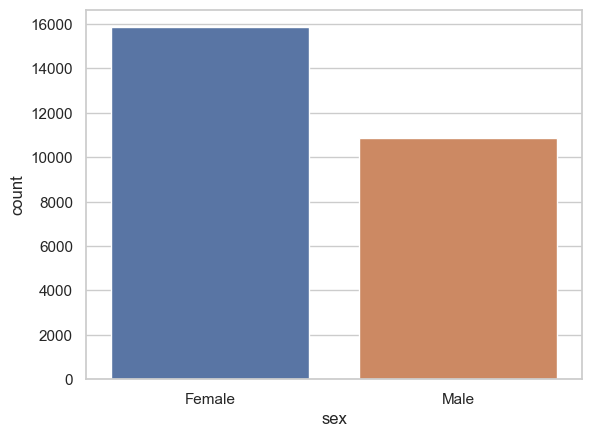

In [61]:
sns.countplot(x='sex',data=df)
plt.show()

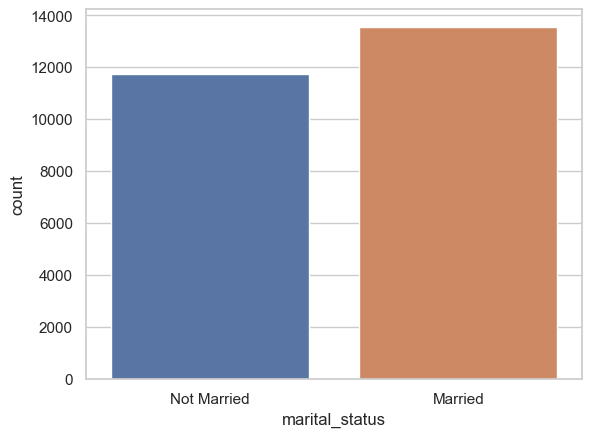

In [62]:
sns.countplot(x='marital_status',data=df)
plt.show()

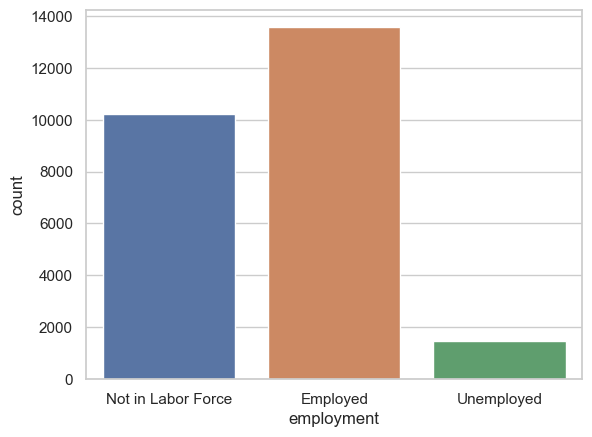

In [63]:
sns.countplot(x="employment",data=df)
plt.show()

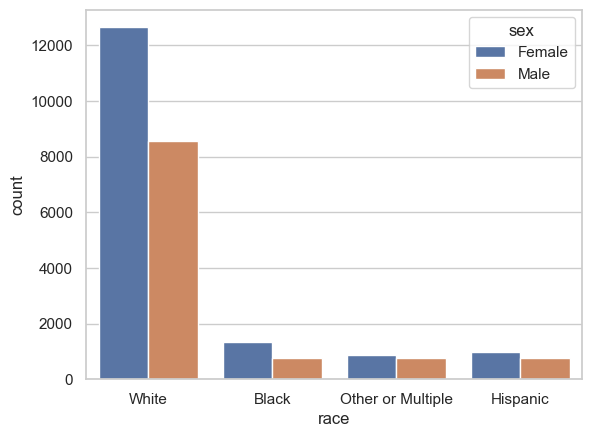

In [64]:
sns.countplot(x="race",hue='sex',data=df)
plt.show()

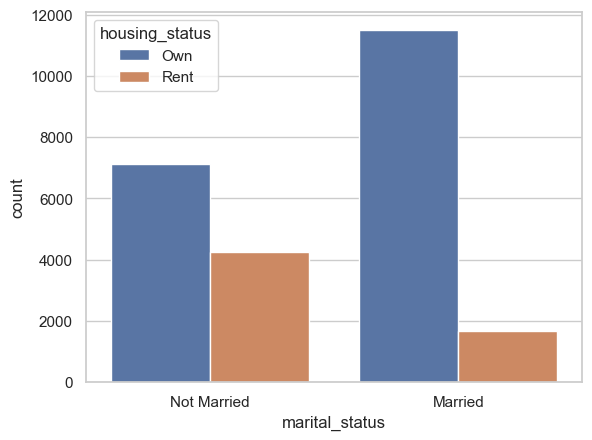

In [65]:
sns.countplot(x="marital_status",hue='housing_status',data=df)
plt.show()

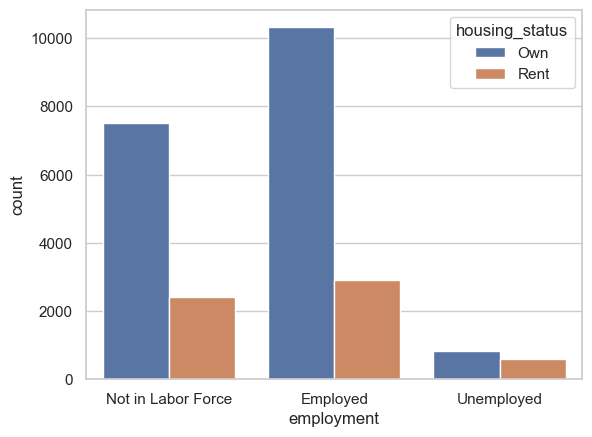

In [66]:
sns.countplot(x="employment",hue='housing_status',data=df)
plt.show()

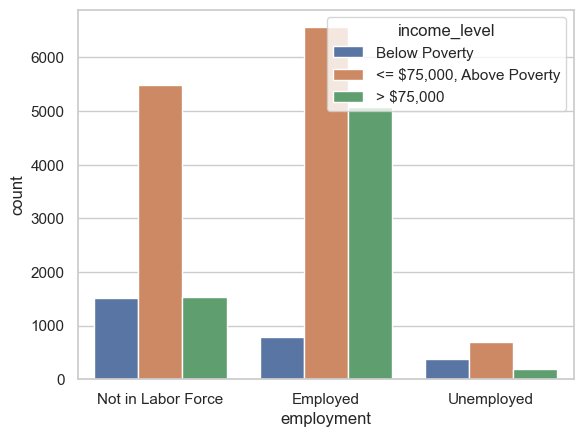

In [67]:
sns.countplot(x="employment",hue='income_level',data=df)
plt.show()

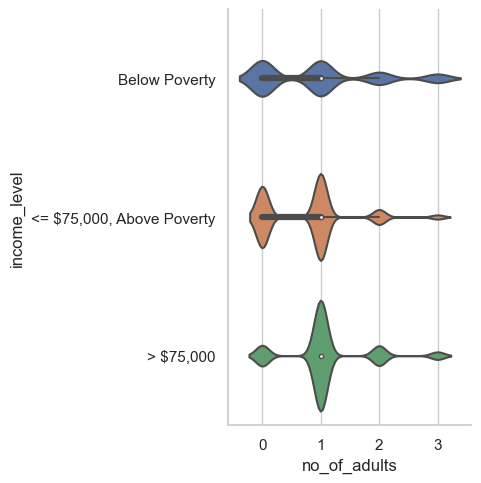

In [68]:
sns.catplot(x='no_of_adults',y="income_level",data=df,kind='violin')

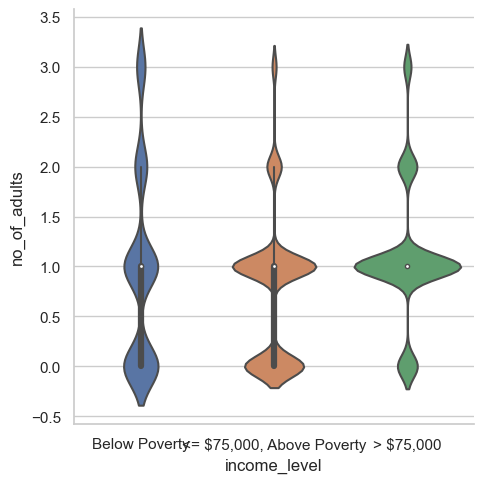

In [70]:
sns.catplot(x='income_level',y="no_of_adults",data=df,kind='violin')

# Data Cleaning

In [71]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [72]:
df=df.drop(['unique_id','income_level','race','qualification','h1n1_worry','employment','marital_status','housing_status','dr_recc_seasonal_vacc','census_msa','contact_avoidance','contact_avoidance','h1n1_awareness','reduced_outside_home_cont','is_health_worker','avoid_touch_face','bought_face_mask','wash_hands_frequently','avoid_large_gatherings'],axis=1)

In [73]:
df.isnull().sum()

antiviral_medication          71
dr_recc_h1n1_vacc           2160
chronic_medic_condition      971
cont_child_undr_6_mnths      820
has_health_insur           12274
is_h1n1_vacc_effective       391
is_h1n1_risky                388
sick_from_h1n1_vacc          395
is_seas_vacc_effective       462
is_seas_risky                514
sick_from_seas_vacc          537
age_bracket                    0
sex                            0
no_of_adults                 249
no_of_children               249
h1n1_vaccine                   0
dtype: int64

In [74]:
df=pd.get_dummies(df,columns=["sex","no_of_adults","no_of_children","age_bracket"])

In [75]:
df.head()

,antiviral_medication,dr_recc_h1n1_vacc,chronic_medic_condition,cont_child_undr_6_mnths,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,...,no_of_adults_3.0,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,...,False,True,False,False,False,False,False,False,True,False
1,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,...,False,True,False,False,False,False,True,False,False,False
2,0.0,NaN,1.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,...,False,True,False,False,False,True,False,False,False,False
3,0.0,0.0,1.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,...,False,True,False,False,False,False,False,False,False,True
4,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,...,False,True,False,False,False,False,False,True,False,False


In [76]:
df.shape

(26707, 27)

In [77]:
df.dtypes

antiviral_medication         float64
dr_recc_h1n1_vacc            float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
h1n1_vaccine                   int64
sex_Female                      bool
sex_Male                        bool
no_of_adults_0.0                bool
no_of_adults_1.0                bool
no_of_adults_2.0                bool
no_of_adults_3.0                bool
no_of_children_0.0              bool
no_of_children_1.0              bool
no_of_children_2.0              bool
no_of_children_3.0              bool
age_bracket_18 - 34 Years       bool
age_bracket_35 - 44 Years       bool
age_bracket_45 - 54 Years       bool
age_bracket_55 - 64 Years       bool
age_bracket_65+ Years           bool
d

In [78]:
df.isnull().sum()

antiviral_medication            71
dr_recc_h1n1_vacc             2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
h1n1_vaccine                     0
sex_Female                       0
sex_Male                         0
no_of_adults_0.0                 0
no_of_adults_1.0                 0
no_of_adults_2.0                 0
no_of_adults_3.0                 0
no_of_children_0.0               0
no_of_children_1.0               0
no_of_children_2.0               0
no_of_children_3.0               0
age_bracket_18 - 34 Years        0
age_bracket_35 - 44 Years        0
age_bracket_45 - 54 Years        0
age_bracket_55 - 64 Years        0
age_bracket_65+ Years            0
dtype: int64

In [79]:
median1=df["dr_recc_h1n1_vacc"].median()
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(np.nan,median1)

In [80]:
median1=df["chronic_medic_condition"].median()
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(np.nan,median1)

In [81]:
median1=df["cont_child_undr_6_mnths"].median()
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(np.nan,median1)

In [82]:
median1=df["has_health_insur"].median()
df["has_health_insur"]=df["has_health_insur"].replace(np.nan,median1)

In [83]:
median1=df["has_health_insur"].median()
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(np.nan,median1)

In [84]:
df.isnull().sum()

antiviral_medication          71
dr_recc_h1n1_vacc              0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                388
sick_from_h1n1_vacc          395
is_seas_vacc_effective       462
is_seas_risky                514
sick_from_seas_vacc          537
h1n1_vaccine                   0
sex_Female                     0
sex_Male                       0
no_of_adults_0.0               0
no_of_adults_1.0               0
no_of_adults_2.0               0
no_of_adults_3.0               0
no_of_children_0.0             0
no_of_children_1.0             0
no_of_children_2.0             0
no_of_children_3.0             0
age_bracket_18 - 34 Years      0
age_bracket_35 - 44 Years      0
age_bracket_45 - 54 Years      0
age_bracket_55 - 64 Years      0
age_bracket_65+ Years          0
dtype: int64

In [85]:
median1=df["is_h1n1_risky"].median()
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(np.nan,median1)

In [86]:
median1=df["sick_from_h1n1_vacc"].median()
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(np.nan,median1)

In [87]:
median1=df["is_seas_vacc_effective"].median()
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(np.nan,median1)

In [88]:
median1=df["is_seas_risky"].median()
df["is_seas_risky"]=df["is_seas_risky"].replace(np.nan,median1)

In [89]:
median1=df["antiviral_medication"].median()
df["antiviral_medication"]=df["antiviral_medication"].replace(np.nan,median1)

In [90]:
median1=df["sick_from_seas_vacc"].median()
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(np.nan,median1)

In [91]:
df.isnull().sum()

antiviral_medication         0
dr_recc_h1n1_vacc            0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
h1n1_vaccine                 0
sex_Female                   0
sex_Male                     0
no_of_adults_0.0             0
no_of_adults_1.0             0
no_of_adults_2.0             0
no_of_adults_3.0             0
no_of_children_0.0           0
no_of_children_1.0           0
no_of_children_2.0           0
no_of_children_3.0           0
age_bracket_18 - 34 Years    0
age_bracket_35 - 44 Years    0
age_bracket_45 - 54 Years    0
age_bracket_55 - 64 Years    0
age_bracket_65+ Years        0
dtype: int64

# classifier

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [94]:
y=df[["h1n1_vaccine"]]
x=df.drop(["h1n1_vaccine"],axis=1)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# logistic regression

In [105]:
model_log=LogisticRegresssion()

NameError: name 'LogisticRegresssion' is not defined

In [103]:
model_log.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
model_log.score(X_test,Y_test)

0.8321477598901784

In [106]:
model_log.score(X_train,Y_train)

0.8260939338825292

In [107]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

<Axes: >

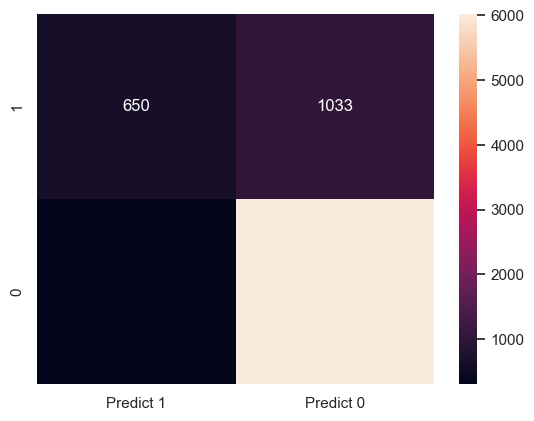

In [108]:
prediction=model_log.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, prediction, labels=[1, 0])
df_cm = pd.DataFrame (cm, index = [i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])

sns.heatmap(df_cm, annot=True, fmt='g')

# decision tree classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
model_dtc=DecisionTreeClassifier(max_depth=2)

In [111]:
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

In [112]:
model_dtc.score(X_test,Y_test)

0.8261574940721328

In [113]:
model_dtc.score(X_train,Y_train)

0.8178025034770514

<Axes: >

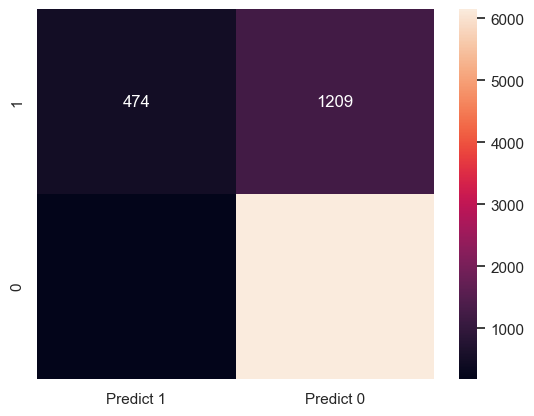

In [114]:
prediction=model_dtc.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, prediction, labels=[1, 0])
df_cm = pd.DataFrame (cm, index = [i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])

sns.heatmap(df_cm, annot=True, fmt='g')

# bagging classifier

In [115]:
rfc=RandomForestClassifier(n_estimators=15,max_features=0.3, min_samples_split=40)

In [116]:
rfc.fit(X_train,Y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22004\1022771658.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


RandomForestClassifier(max_features=0.3, min_samples_split=40, n_estimators=15)

In [117]:
rfc.score(X_train,Y_train)

0.8473841874398202

In [118]:
rfc.score(X_test,Y_test)

0.8331461375265194

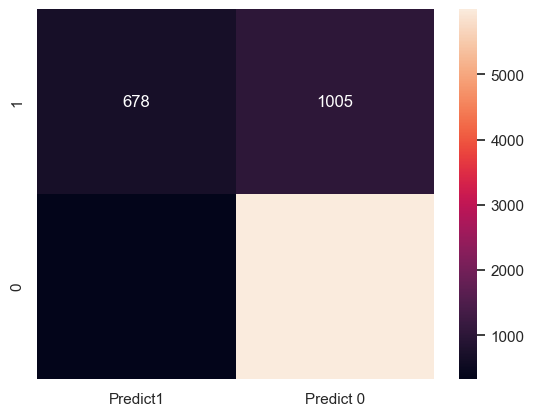

In [119]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=rfc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
rfcp = accuracy_score(Y_test,predictions)

# KNeighbors Classifier

In [120]:
knc=KNeighborsClassifier()

In [121]:
knc.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [122]:
knc.score(X_train,Y_train)

0.8504867872044506

In [123]:
knc.score(X_test,Y_test)

0.8133033820042431

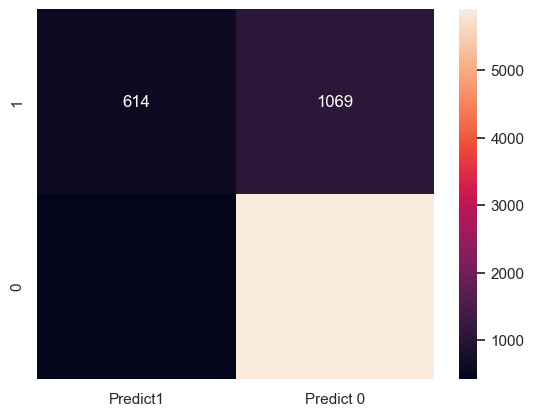

In [124]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=knc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
kncp= accuracy_score(Y_test,predictions)

# Gradient Boosting Classifier

In [125]:
gbc=GradientBoostingClassifier(learning_rate=0.99,n_estimators=50)

In [126]:
gbc.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.99, n_estimators=50)

In [127]:
gbc.score(X_train,Y_train)

0.8415534396062908

In [128]:
gbc.score(X_test,Y_test)

0.8318981654810932

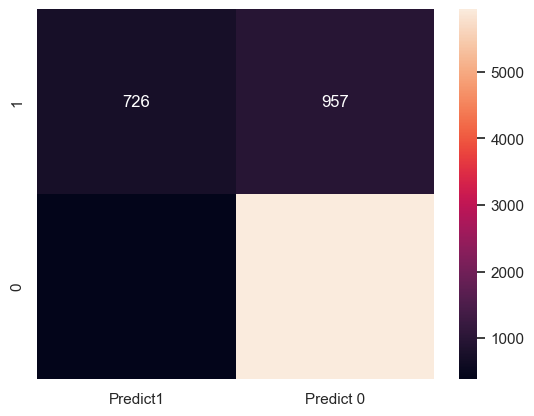

In [131]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=gbc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
kncp= accuracy_score(Y_test,predictions)

# AdaBoost Classifier

In [132]:
adc=AdaBoostClassifier(learning_rate=0.0000001, n_estimators=50)

In [133]:
adc.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1e-07)

In [134]:
adc.score(X_train,Y_train)

0.7988659462929282

In [135]:
adc.score(X_test,Y_test)

0.8048171720953451

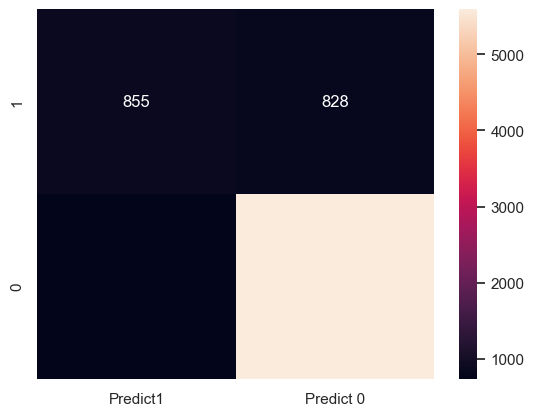

In [136]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=adc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
kncp= accuracy_score(Y_test,predictions)

# support vector classifier

In [138]:
svc=AdaBoostClassifier(learning_rate=0.0000001, n_estimators=50)

In [139]:
svc.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1e-07)

In [140]:
svc.score(X_train,Y_train)

0.7988659462929282

In [141]:
svc.score(X_test,Y_test)

0.8048171720953451

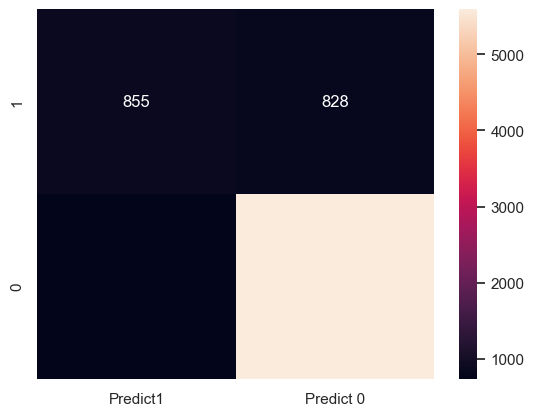

In [142]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=svc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
kncp= accuracy_score(Y_test,predictions)